# Classification

## Imports
Importing important libraries used in the cells below.

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Patch
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.callbacks import EarlyStopping
from keras.callbacks import ReduceLROnPlateau
from keras.optimizers import Adam

## Data

Load the simulated data downloaded from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Electrical+Grid+Stability+Simulated+Data+).

In [30]:
# Drop stab since we are only concerned with the classification problem with this data.
data = pd.read_csv('./data/Electrical_grid.csv').drop(columns=['stab'])
data

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,unstable
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2.930406,9.487627,2.376523,6.187797,3.343416,-0.658054,-1.449106,-1.236256,0.601709,0.779642,0.813512,0.608385,unstable
9996,3.392299,1.274827,2.954947,6.894759,4.349512,-1.663661,-0.952437,-1.733414,0.502079,0.567242,0.285880,0.366120,stable
9997,2.364034,2.842030,8.776391,1.008906,4.299976,-1.380719,-0.943884,-1.975373,0.487838,0.986505,0.149286,0.145984,stable
9998,9.631511,3.994398,2.757071,7.821347,2.514755,-0.966330,-0.649915,-0.898510,0.365246,0.587558,0.889118,0.818391,unstable


In [31]:
# Change target col to 0 if stable and 1 if unstable
stab_bool = {
    'stable': 0,
    'unstable': 1
}
data['stabf'].replace(stab_bool, inplace=True)
data

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,1
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,0
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,1
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,1
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2.930406,9.487627,2.376523,6.187797,3.343416,-0.658054,-1.449106,-1.236256,0.601709,0.779642,0.813512,0.608385,1
9996,3.392299,1.274827,2.954947,6.894759,4.349512,-1.663661,-0.952437,-1.733414,0.502079,0.567242,0.285880,0.366120,0
9997,2.364034,2.842030,8.776391,1.008906,4.299976,-1.380719,-0.943884,-1.975373,0.487838,0.986505,0.149286,0.145984,0
9998,9.631511,3.994398,2.757071,7.821347,2.514755,-0.966330,-0.649915,-0.898510,0.365246,0.587558,0.889118,0.818391,1


In [32]:
# Split into X and y.
target_col = 'stabf'
X = data.drop(columns=[target_col])
y = data[target_col]
X, y

(          tau1      tau2      tau3      tau4        p1        p2        p3  \
 0     2.959060  3.079885  8.381025  9.780754  3.763085 -0.782604 -1.257395   
 1     9.304097  4.902524  3.047541  1.369357  5.067812 -1.940058 -1.872742   
 2     8.971707  8.848428  3.046479  1.214518  3.405158 -1.207456 -1.277210   
 3     0.716415  7.669600  4.486641  2.340563  3.963791 -1.027473 -1.938944   
 4     3.134112  7.608772  4.943759  9.857573  3.525811 -1.125531 -1.845975   
 ...        ...       ...       ...       ...       ...       ...       ...   
 9995  2.930406  9.487627  2.376523  6.187797  3.343416 -0.658054 -1.449106   
 9996  3.392299  1.274827  2.954947  6.894759  4.349512 -1.663661 -0.952437   
 9997  2.364034  2.842030  8.776391  1.008906  4.299976 -1.380719 -0.943884   
 9998  9.631511  3.994398  2.757071  7.821347  2.514755 -0.966330 -0.649915   
 9999  6.530527  6.781790  4.349695  8.673138  3.492807 -1.390285 -1.532193   
 
             p4        g1        g2        g3     

In [33]:
# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

## Data Analysis
Plots and correlations to see if any features can be dropped.

In [34]:
data.corr()['stabf']

tau1     0.234898
tau2     0.246280
tau3     0.237492
tau4     0.239375
p1       0.009938
p2       0.006173
p3      -0.000649
p4      -0.022785
g1       0.197664
g2       0.217341
g3       0.231774
g4       0.204931
stabf    1.000000
Name: stabf, dtype: float64

<Figure size 1152x576 with 0 Axes>

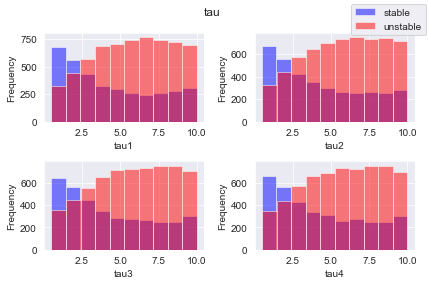

In [35]:
plt.figure(figsize=(16, 8))
fig, ax = plt.subplots(2, 2)
i = 0
j = 0
legend = [Patch(facecolor='blue', alpha=0.5),
          Patch(facecolor='red', alpha=0.5)]
for k in range(4):
    ax[i, j].hist(data[data.stabf == 0][[f'tau{k+1}']], alpha=0.5, color='blue')
    ax[i, j].hist(data[data.stabf == 1][[f'tau{k+1}']], alpha=0.5, color='red')
    ax[i, j].set_xlabel(f'tau{k+1}')
    ax[i, j].set_ylabel('Frequency')
    j += 1
    if j == 2:
        j = 0
        i += 1
fig.suptitle('tau')
fig.legend(legend, ['stable', 'unstable'])
plt.tight_layout()
plt.show()

<Figure size 1152x576 with 0 Axes>

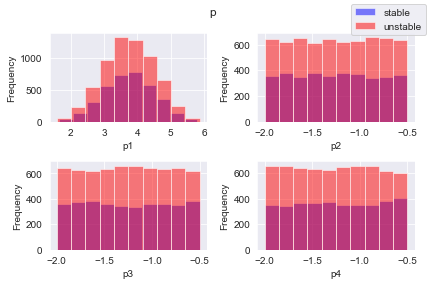

In [36]:
plt.figure(figsize=(16, 8))
fig, ax = plt.subplots(2, 2)
i = 0
j = 0
legend = [Patch(facecolor='blue', alpha=0.5),
          Patch(facecolor='red', alpha=0.5)]
for k in range(4):
    ax[i, j].hist(data[data.stabf == 0][[f'p{k+1}']], alpha=0.5, color='blue')
    ax[i, j].hist(data[data.stabf == 1][[f'p{k+1}']], alpha=0.5, color='red')
    ax[i, j].set_xlabel(f'p{k+1}')
    ax[i, j].set_ylabel('Frequency')
    j += 1
    if j == 2:
        j = 0
        i += 1
fig.suptitle('p')
fig.legend(legend, ['stable', 'unstable'])
plt.tight_layout()
plt.show()

<Figure size 1152x576 with 0 Axes>

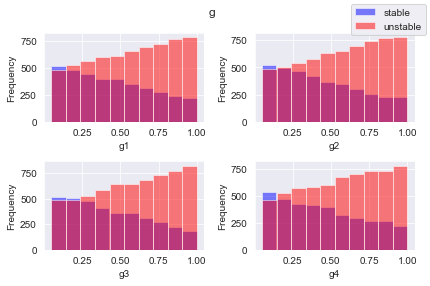

In [37]:
plt.figure(figsize=(16, 8))
fig, ax = plt.subplots(2, 2)
i = 0
j = 0
legend = [Patch(facecolor='blue', alpha=0.5),
          Patch(facecolor='red', alpha=0.5)]
for k in range(4):
    ax[i, j].hist(data[data.stabf == 0][[f'g{k+1}']], alpha=0.5, color='blue')
    ax[i, j].hist(data[data.stabf == 1][[f'g{k+1}']], alpha=0.5, color='red')
    ax[i, j].set_xlabel(f'g{k+1}')
    ax[i, j].set_ylabel('Frequency')
    j += 1
    if j == 2:
        j = 0
        i += 1
fig.suptitle('g')
fig.legend(legend, ['stable', 'unstable'])
plt.tight_layout()
plt.show()

The p feature could be potentially dropped for linear models, since the correlation is low. For each model, a version without the p feature will be scored along with all of the features together.

In [38]:
p_cols = [col for col in X if col.startswith('p')]
X_train_no_p = X_train.drop(columns=p_cols)
X_test_no_p = X_test.drop(columns=p_cols)
X_train_no_p

,tau1,tau2,tau3,tau4,g1,g2,g3,g4
2396,7.868205,3.177032,8.679133,5.747742,0.699309,0.677815,0.660942,0.427197
1853,7.231598,0.821405,5.948496,4.818410,0.255591,0.374161,0.391151,0.641752
3560,3.195612,7.658832,3.038577,2.767142,0.572445,0.566165,0.589529,0.218758
3089,3.470796,7.536089,4.404572,4.912880,0.536886,0.624458,0.547419,0.682132
8258,3.328847,7.479044,7.394988,0.810869,0.203568,0.650212,0.949980,0.112530
...,...,...,...,...,...,...,...,...
8890,8.974265,5.055780,7.091820,9.110993,0.496689,0.586284,0.296340,0.254126
2217,6.879395,1.783336,1.004932,7.229903,0.438394,0.518469,0.215167,0.839316
6527,6.315242,2.703028,9.116152,4.482906,0.840321,0.911523,0.233065,0.726080
5209,4.599969,5.423175,5.718775,2.732052,0.288705,0.859399,0.539599,0.065688


## Logistic Regression Model

### Training

In [39]:
params = {
    'penalty': ('l1', 'l2'),
    'C': np.logspace(-5, 2, 50),
    'solver': ('liblinear', 'saga')
}
clf = GridSearchCV(LogisticRegression(), params, cv=5, scoring='roc_auc', n_jobs=-1)
clf.fit(X_train, y_train)

C:\Users\prest\anaconda3\envs\Tensorflow\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.00000000e-05, 1.38949549e-05, 1.93069773e-05, 2.68269580e-05,
       3.72759372e-05, 5.17947468e-05, 7.19685673e-05, 1.00000000e-04,
       1.38949549e-04, 1.93069773e-04, 2.68269580e-04, 3.72759372e-04,
       5.17947468e-04, 7.19685673e-04, 1.00000000e-03, 1.38949549e-03,
       1.93069773e-03, 2.68269580e-0...
       1.00000000e-01, 1.38949549e-01, 1.93069773e-01, 2.68269580e-01,
       3.72759372e-01, 5.17947468e-01, 7.19685673e-01, 1.00000000e+00,
       1.38949549e+00, 1.93069773e+00, 2.68269580e+00, 3.72759372e+00,
       5.17947468e+00, 7.19685673e+00, 1.00000000e+01, 1.38949549e+01,
       1.93069773e+01, 2.68269580e+01, 3.72759372e+01, 5.17947468e+01,
       7.19685673e+01, 1.00000000e+02]),
                         'penalty': ('l1', 'l2'),
                         'solver': ('liblinear', 'saga')},
             scoring='roc_auc')

### Testing

With p:
auc: 0.8855063591357262
acc: 0.812


<AxesSubplot:>

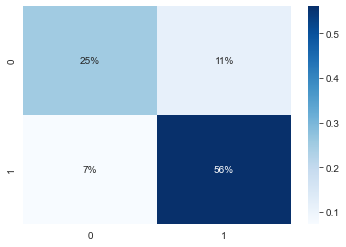

In [40]:
y_pred = clf.predict(X_test)
auc = clf.score(X_test, y_test)
acc = accuracy_score(y_test, y_pred)
cmat = confusion_matrix(y_test, y_pred)
print(f'With p:\nauc: {auc}\nacc: {acc}')
sns.heatmap(cmat / np.sum(cmat), cmap='Blues', annot=True, fmt='.0%')

### Training without p

In [41]:
clf = GridSearchCV(LogisticRegression(), params, cv=5, scoring='roc_auc', n_jobs=-1)
clf.fit(X_train_no_p, y_train)

C:\Users\prest\anaconda3\envs\Tensorflow\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.00000000e-05, 1.38949549e-05, 1.93069773e-05, 2.68269580e-05,
       3.72759372e-05, 5.17947468e-05, 7.19685673e-05, 1.00000000e-04,
       1.38949549e-04, 1.93069773e-04, 2.68269580e-04, 3.72759372e-04,
       5.17947468e-04, 7.19685673e-04, 1.00000000e-03, 1.38949549e-03,
       1.93069773e-03, 2.68269580e-0...
       1.00000000e-01, 1.38949549e-01, 1.93069773e-01, 2.68269580e-01,
       3.72759372e-01, 5.17947468e-01, 7.19685673e-01, 1.00000000e+00,
       1.38949549e+00, 1.93069773e+00, 2.68269580e+00, 3.72759372e+00,
       5.17947468e+00, 7.19685673e+00, 1.00000000e+01, 1.38949549e+01,
       1.93069773e+01, 2.68269580e+01, 3.72759372e+01, 5.17947468e+01,
       7.19685673e+01, 1.00000000e+02]),
                         'penalty': ('l1', 'l2'),
                         'solver': ('liblinear', 'saga')},
             scoring='roc_auc')

### Testing without p

Without p:
auc: 0.8855077950927603
acc: 0.8113333333333334


<AxesSubplot:>

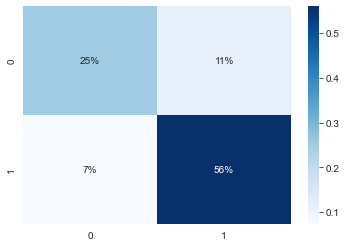

In [42]:
y_pred = clf.predict(X_test_no_p)
auc = clf.score(X_test_no_p, y_test)
acc = accuracy_score(y_test, y_pred)
cmat = confusion_matrix(y_test, y_pred)
print(f'Without p:\nauc: {auc}\nacc: {acc}')
sns.heatmap(cmat / np.sum(cmat), cmap='Blues', annot=True, fmt='.0%')

## Random Forest

### Training

In [43]:
params = {
    'n_estimators': np.arange(100, 600, 100),
    'max_depth': np.arange(50, 250, 50)
}
clf = GridSearchCV(RandomForestClassifier(), params, cv=5, scoring='roc_auc', n_jobs=-1)
clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': array([ 50, 100, 150, 200]),
                         'n_estimators': array([100, 200, 300, 400, 500])},
             scoring='roc_auc')

### Testing

With p:
auc:0.9831210430408974
acc:0.9273333333333333


<AxesSubplot:>

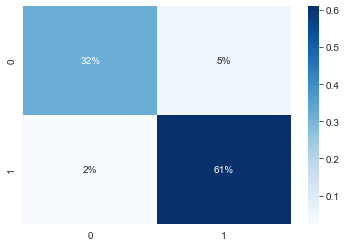

In [44]:
y_pred = clf.predict(X_test)
auc = clf.score(X_test, y_test)
acc = accuracy_score(y_test, y_pred)
cmat = confusion_matrix(y_test, y_pred)
print(f'With p:\nauc:{auc}\nacc:{acc}')
sns.heatmap(cmat / np.sum(cmat), cmap='Blues', annot=True, fmt='.0%')

### Training without p col

In [45]:
clf = GridSearchCV(RandomForestClassifier(), params, cv=5, scoring='roc_auc', n_jobs=-1)
clf.fit(X_train_no_p, y_train)


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': array([ 50, 100, 150, 200]),
                         'n_estimators': array([100, 200, 300, 400, 500])},
             scoring='roc_auc')

### Testing without p

Without p:
auc:0.9851522042658455
acc:0.9313333333333333


<AxesSubplot:>

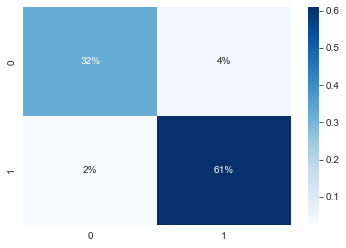

In [46]:
y_pred = clf.predict(X_test_no_p)
auc = clf.score(X_test_no_p, y_test)
acc = accuracy_score(y_test, y_pred)
cmat = confusion_matrix(y_test, y_pred)
print(f'Without p:\nauc:{auc}\nacc:{acc}')
sns.heatmap(cmat / np.sum(cmat), cmap='Blues', annot=True, fmt='.0%')

## Xgboost

### Training

In [47]:
params = {
    'eta': np.logspace(-6, 0, 7),
    'max_depth': np.arange(50, 250, 50)
}
clf = GridSearchCV(XGBClassifier(), params, cv=5, scoring='roc_auc', n_jobs=-1)
clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=XGBClassifier(), n_jobs=-1,
             param_grid={'eta': array([1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00]),
                         'max_depth': array([ 50, 100, 150, 200])},
             scoring='roc_auc')

### Testing

With p:
auc:0.9880245969866921
acc:0.9393333333333334


<AxesSubplot:>

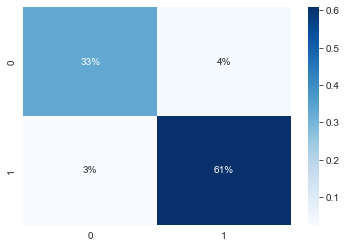

In [48]:
y_pred = clf.predict(X_test)
auc = clf.score(X_test, y_test)
acc = accuracy_score(y_test, y_pred)
cmat = confusion_matrix(y_test, y_pred)
print(f'With p:\nauc:{auc}\nacc:{acc}')
sns.heatmap(cmat / np.sum(cmat), cmap='Blues', annot=True, fmt='.0%')

### Training without p

In [49]:
clf = GridSearchCV(XGBClassifier(), params, cv=5, scoring='roc_auc', n_jobs=-1)
clf.fit(X_train_no_p, y_train)

GridSearchCV(cv=5, estimator=XGBClassifier(), n_jobs=-1,
             param_grid={'eta': array([1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00]),
                         'max_depth': array([ 50, 100, 150, 200])},
             scoring='roc_auc')

### Testing without p

Without p:
auc:0.9886525888630046
acc:0.9406666666666667


<AxesSubplot:>

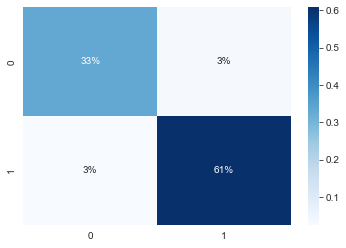

In [50]:
y_pred = clf.predict(X_test_no_p)
auc = clf.score(X_test_no_p, y_test)
acc = accuracy_score(y_test, y_pred)
cmat = confusion_matrix(y_test, y_pred)
print(f'Without p:\nauc:{auc}\nacc:{acc}')
sns.heatmap(cmat / np.sum(cmat), cmap='Blues', annot=True, fmt='.0%')

# Neural Network

### Training

In [51]:
kfold = KFold(n_splits=5)
inputs = np.asarray(X_train)
input_no_p = np.asarray(X_train_no_p)
target = np.asarray(y_train)
split_data = list(kfold.split(inputs, target))
split_data_no_p = list(kfold.split(input_no_p, target))

In [52]:
def create_model():
    model = Sequential()
    model.add(Dense(1024, 'relu'))
    model.add(Dense(128, 'relu'))
    model.add(Dense(8, 'exponential'))
    model.add(Dense(128, 'relu'))
    model.add(Dense(1024, 'selu'))
    model.add(Dropout(0.7))
    model.add(Dense(1, 'sigmoid'))
    optimizer = Adam(learning_rate=1e-3)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['AUC', 'accuracy'])
    return model

In [53]:
clf = create_model()
listed_scores = []
for train, val in split_data:
    early_stopping = EarlyStopping(monitor='val_auc', patience=10, restore_best_weights=True)
    reduce_lr = ReduceLROnPlateau(monitor='val_auc', factor=0.5, patience=2, min_lr=1e-4)
    clf.fit(inputs[train], target[train], validation_data=(inputs[val], target[val]), callbacks=[early_stopping, reduce_lr], batch_size=16, validation_batch_size=3, epochs=999999, verbose=0)
    y_preds = clf.predict(inputs[val])
    listed_scores.append(roc_auc_score(target[val], y_preds))
print(np.mean(listed_scores))

0.9603152060688827


### Testing

With p:
auc: 0.9686923027038574
acc: 0.9026666879653931


<AxesSubplot:>

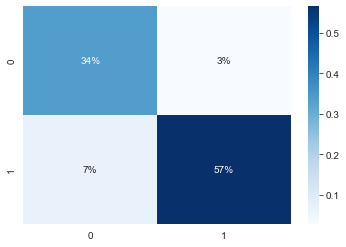

In [54]:
_, auc, acc = clf.evaluate(X_test, y_test, verbose=0)
y_pred = np.round(clf.predict(X_test))
cmat = confusion_matrix(y_test, y_pred)
print(f'With p:\nauc: {auc}\nacc: {acc}')
sns.heatmap(cmat / np.sum(cmat), cmap='Blues', annot=True, fmt='.0%')

### Training no p

In [55]:
clf = create_model()
for train, val in split_data_no_p:
    early_stopping = EarlyStopping(monitor='val_auc', patience=10, restore_best_weights=True)
    reduce_lr = ReduceLROnPlateau(monitor='val_auc', factor=0.5, patience=2, min_lr=1e-4)
    clf.fit(input_no_p[train], target[train], validation_data=(input_no_p[val], target[val]), callbacks=[early_stopping, reduce_lr], batch_size=16, validation_batch_size=3, epochs=999999, verbose=0)


### Testing no p

Without p:
auc: 0.9827035069465637
acc: 0.9359999895095825


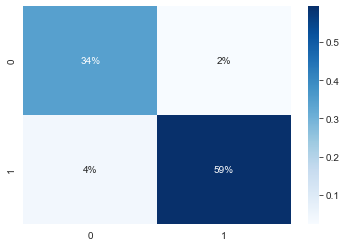

In [56]:
_, auc, acc = clf.evaluate(X_test_no_p, y_test, verbose=0)
y_pred = np.round(clf.predict(X_test_no_p))
cmat = confusion_matrix(y_test, y_pred)
print(f'Without p:\nauc: {auc}\nacc: {acc}')
sns.heatmap(cmat / np.sum(cmat), cmap='Blues', annot=True, fmt='.0%')
plt.show()